In [3]:
%load_ext autoreload
%autoreload 2

In [36]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from baseVAE import BaseVAE
from SVAE import SupervisedVAE

# Загрузка и анализ данных

In [4]:
mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=0.5, std=0.5),
                                       transforms.Lambda(lambda x: x.view(-1, 784))])

data = datasets.MNIST(root=r'data', train=True, download=True, transform=mnist_transforms)

train_loader = DataLoader(data, batch_size=128, shuffle=True, num_workers=4) 

In [13]:
test_dataset = datasets.MNIST('data', train=False, transform=mnist_transforms)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [11]:
num_epochs = 10

# VAE №2

In [33]:
vae = BaseVAE(input_dim=784, hidden_dims=[128, 64], z_dim=2)
losses = vae.fit(train_loader, epochs=num_epochs, lr=1e-3)

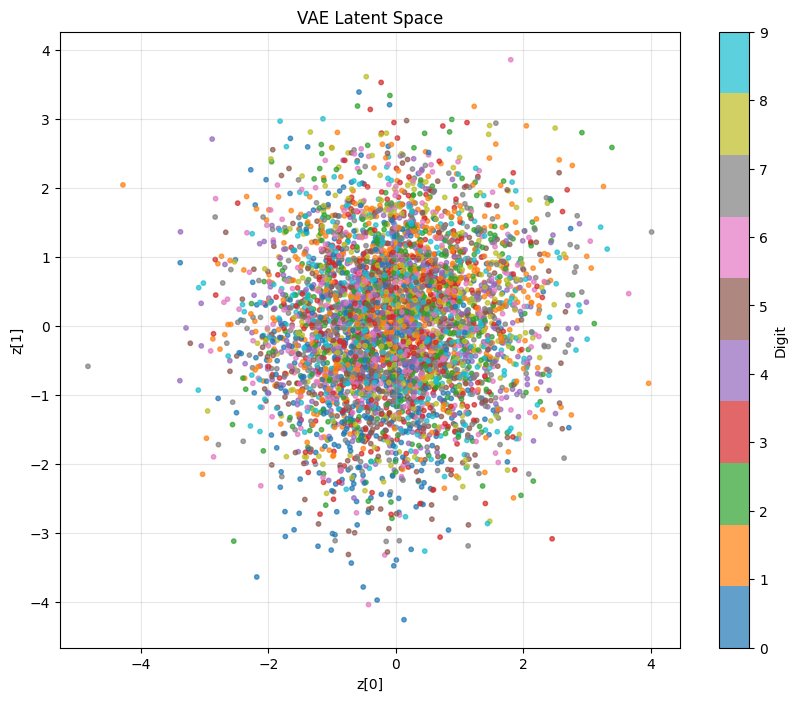

In [44]:
vae.plot_latent_space(test_loader, n_samples=5000)

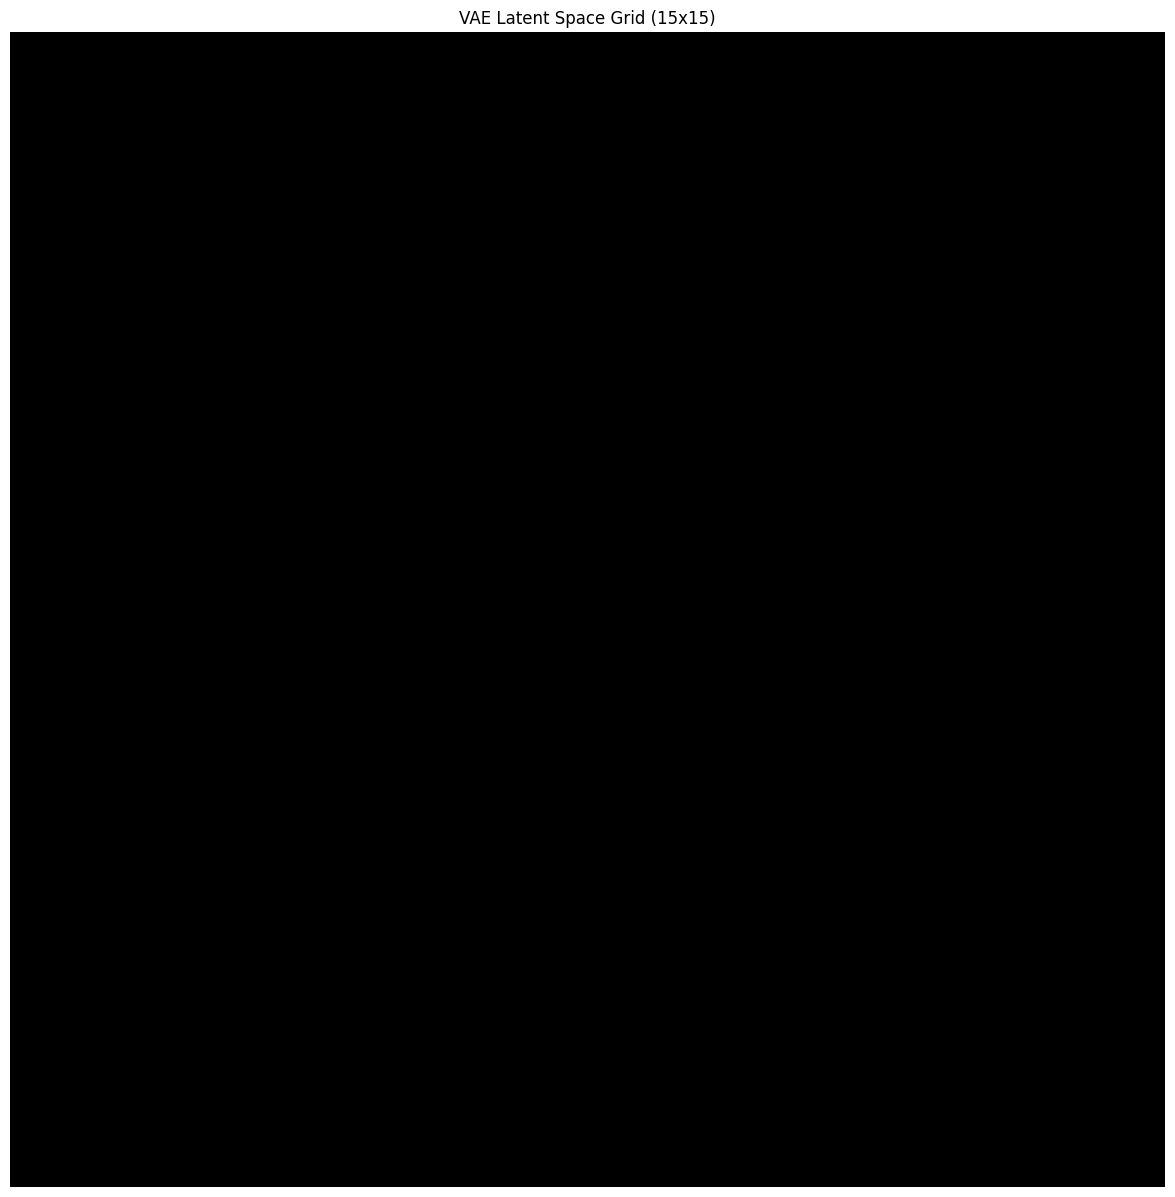

In [24]:
vae.plot_latent_grid(grid_size=15, latent_range=3.0)

# SVAE №3

In [41]:
svae = SupervisedVAE(input_dim=784, n_classes=10, hidden_dims=[128, 64], z_dim=2)
losses = svae.fit(train_loader, epochs=num_epochs)

Epoch  1: Loss=1.7936


Epoch  2: Loss=1.3383


Epoch  3: Loss=1.2794


Epoch  4: Loss=1.2382


Epoch  5: Loss=1.2135


Epoch  6: Loss=1.1933


Epoch  7: Loss=1.1806


Epoch  8: Loss=1.1722


Epoch  9: Loss=1.1579


Epoch 10: Loss=1.1531


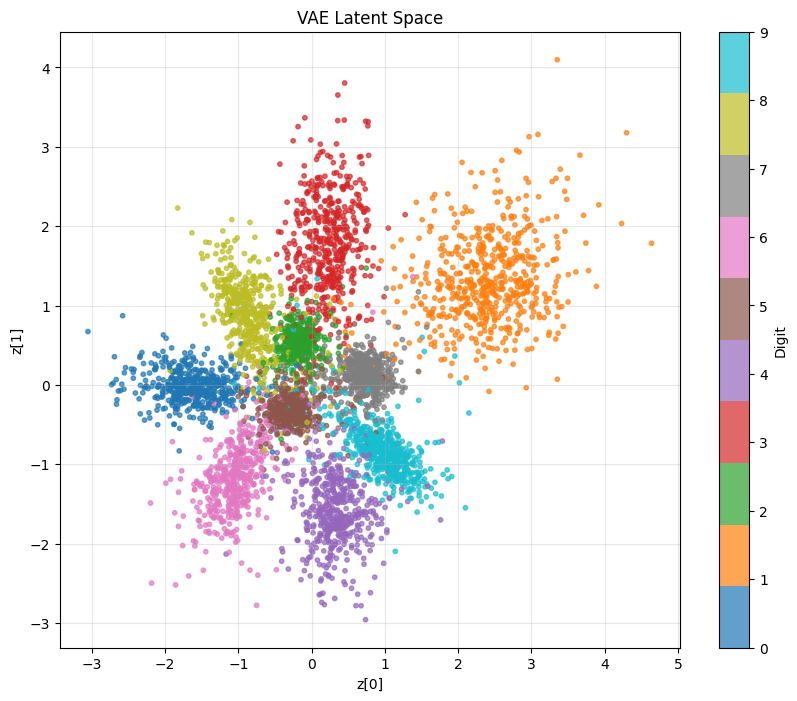

In [45]:
svae.plot_latent_space(test_loader, n_samples=5000)

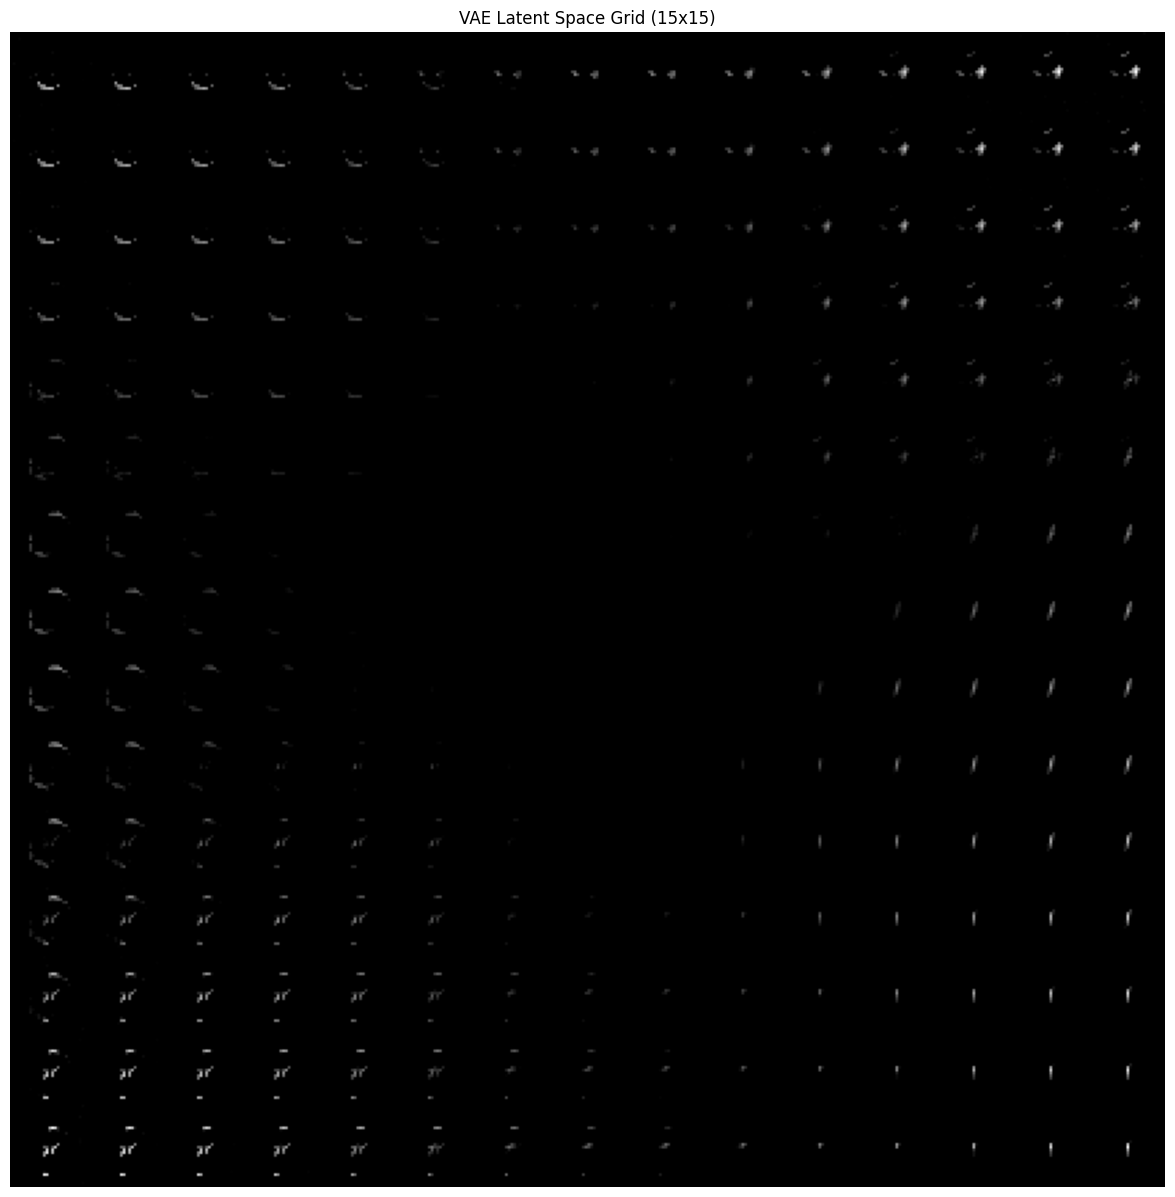

In [43]:
svae.plot_latent_grid(grid_size=15, latent_range=3.0)